# Hill Climbing

---

This notebook will train an Agent to solve the OpenAI Gym [Cartpole]() environment using vanilla hill climbing. This is a
policy based method used to find the optimal policy. [Here](https://en.wikipedia.org/wiki/Hill_climbing) is an explanation of
the hill climbing optimization technique. Based on its simplicity, and the fact it could get stuck in local maximums,
I expect this algorithm to have stability issues. We will test this by running the simulations with different
random seeds and see how the results differ. All results will be saved in the saved_scores directory and can be viewed in
the images directory. Also comparisons between agents can be seen by using the comparisons.ipynb.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Define the Policy Network

In [4]:
class Policy():
    """ Policy Represented as Neural Network """
    def __init__(self, env, seed=0):
        np.random.seed(seed)
        self.env = env
        self.state_space = env.observation_space.shape[0]
        self.action_space = env.action_space.n
        self.w = 0.0001*np.random.rand(self.state_space, self.action_space)  # weights for simple linear policy: state_space x action_space
        
    def forward_pass(self, state):
        x = np.dot(state, self.w)
        return np.exp(x)/sum(np.exp(x)) #softmax
    
    def get_action(self, state):
        probs = self.forward_pass(state)
        #action = np.random.choice(2, p=probs) # option 1: stochastic policy
        action = np.argmax(probs)              # option 2: deterministic policy
        return action

### 3. Train the Agent with Vanilla Hill Climbing

In [16]:
env = gym.make('CartPole-v0')
policy = Policy(env=env, seed=0)

def hill_climbing(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100, noise_scale=0.01):
    """Implementation of Vanilla Hill Climbing

    :param n_episodes: max number of training episodes
    :param max_t: max number of timesteps per episode
    :param gamma: discount rate
    :param print_every: how often to print average score
    :param noise_scale: std deviation of additive noise
    :return:
    """
    scores_deque = deque(maxlen=100)
    scores = []
    best_reward = -np.Inf
    best_weights = policy.w
    for i_episode in range(1, n_episodes+1):
        rewards = []

        #Single Episode Run to done or max_timestep
        state = env.reset()
        for t in range(max_t):
            action = policy.get_action(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break
        # Store results of Single Episode
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        #Calculate Discounted Reward
        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])

        # Update Network Weights for next Episode
        if R >= best_reward: # found better weights
            best_reward = R
            best_weights = policy.w
            policy.w += noise_scale * np.random.rand(*policy.w.shape)
        else: # did not find better weights
            policy.w = best_weights + noise_scale * np.random.rand(*policy.w.shape)

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            policy.w = best_weights
            break
        
    return scores
            
scores = hill_climbing()

Episode 100	Average Score: 105.33
Episode 200	Average Score: 180.02
Environment solved in 116 episodes!	Average Score: 195.34


### 4. Plot the Scores

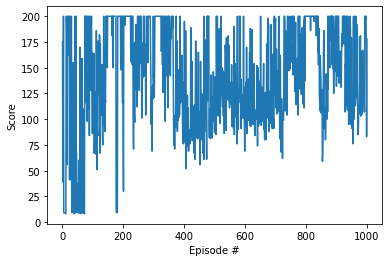

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In [11]:
env = gym.make('CartPole-v0')
state = env.reset()
for t in range(200):
    action = policy.get_action(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()